## Компьютерный практикум №4. Иерархическая кластеризация

<p style="text-indent: 25px;">
    Доброго времени суток, <b>Елена Константиновна</b>!
</p>
<p style="text-indent: 25px;">
    Задания в данной лабораторной следующие:
    <ol>
        <li><i>Реализовать алгоритм.</i></li>
        <li><i>Вывести таблицу обьединения кластеров и дендрограму.</i></li>
        <li><i>Из набора данных в КП2 отобрать 20 случайных обьектов и провести кластерный анализ.</i></li>
        <li><i>Сделать выводы.</i></li>
    </ol>
</p>
<p style="text-indent: 25px;">
    Прежде чем приступить к заданиям, для начала импортируем необходимые библиотеки.
</p>

### 1. Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import copy

<p style="text-indent: 25px;">
    Затем загрузим наши данные. В данной лабораторной по варианту (№1) я должна использовать данные о диабете, в качестве переменных (характеристик обьектов) будут выступать: гемоглобин, вес и протромбированное время.
</p>

![Варианты](Screenshot_1.png)

### 2. Загрузка данных

In [2]:
init_data = pd.read_excel('Diabet.xlsx')
init_data.head()

,№,Уровень холестерина,Стабілізована глюкоза,Ліпопротеїни,Співвідношення холестерину до ліпопротеїну,Гемоглобін,Вік,Стать,Зріст,Вага,Систолічний тиск,Діастолічний тиск,Талія (дюйм),Стегна (дюйми),Протромбіновий час
0,1000,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,138.0,80.0,44.0,41.0,300.0


In [3]:
init_data.columns

Index(['№', 'Уровень холестерина', 'Стабілізована глюкоза', 'Ліпопротеїни',
       'Співвідношення холестерину до ліпопротеїну', 'Гемоглобін', 'Вік',
       'Стать', 'Зріст', 'Вага', 'Систолічний тиск', 'Діастолічний тиск',
       'Талія (дюйм)', 'Стегна (дюйми)', 'Протромбіновий час'],
      dtype='object')

In [4]:
init_data = init_data[['Гемоглобін', 'Вага', 'Протромбіновий час']]
init_data.head()

,Гемоглобін,Вага,Протромбіновий час
0,4.31,121.0,720.0
1,4.44,218.0,360.0
2,4.64,256.0,180.0
3,4.63,119.0,480.0
4,7.72,183.0,300.0


<p style="text-indent: 25px;">
    Из вывода видно, что датафрейм имеет пропущенные значения (помечены как <b>NaN</b>). Посмотрим также на то, в каких диапазонах лежат столбцы. 
</p>

In [5]:
init_data.describe()  # describe - статистическое описание данных

,Гемоглобін,Вага,Протромбіновий час
count,390.000000,402.000000,400.000000
mean,5.589769,177.592040,341.250000
std,2.242595,40.340666,309.540953
min,2.680000,99.000000,5.000000
25%,4.380000,151.000000,90.000000
50%,4.840000,172.500000,240.000000
75%,5.600000,200.000000,517.500000
max,16.110001,325.000000,1560.000000


<p style="text-indent: 25px;">
    Четко видно, что данные столбцы несоизмеримы, соответственно необходимо эти данные нормализовать.
</p>
<p style="text-indent: 25px;">
    Сперва реализуем функцию для замены пропущенных значений (будем заменять средними). 
</p>

In [6]:
# замена пропущенных значений
def replacing(df, col_name):
    mean_val = np.mean(df[col_name])
    for i in range(df.shape[0]):
        if np.isnan(df.iloc[i][col_name]):
            df[col_name][i] = mean_val
    return df

In [7]:
data = init_data.copy()
for col_name in init_data.columns.tolist():
    data = replacing(data, col_name)
data.head()

,Гемоглобін,Вага,Протромбіновий час
0,4.31,121.0,720.0
1,4.44,218.0,360.0
2,4.64,256.0,180.0
3,4.63,119.0,480.0
4,7.72,183.0,300.0


<p style="text-indent: 25px;">
     Затем реализуем функцию для нормализации данных (будем использовать min-max). 
</p>

In [8]:
# нормализация данных
def normalization(df, col_name):
    df[col_name] = (df[col_name] - np.min(df[col_name])) / (np.max(df[col_name]) - np.min(df[col_name]))
    return df

In [9]:
norm_data = data.copy()
for col_name in init_data.columns.tolist():
    norm_data = normalization(norm_data, col_name)
norm_data.head()

,Гемоглобін,Вага,Протромбіновий час
0,0.121370,0.097345,0.459807
1,0.131050,0.526549,0.228296
2,0.145942,0.694690,0.112540
3,0.145197,0.088496,0.305466
4,0.375279,0.371681,0.189711


<p style="text-indent: 25px;">
     Теперь перейдем непосредственно к заданиям.
</p>

### 3. Иерархическая кластеризация

In [10]:
data_for_clustering = norm_data.values[:20, :]
data_for_clustering

array([[0.12137005, 0.09734513, 0.45980707],
       [0.13104988, 0.52654867, 0.22829582],
       [0.1459419 , 0.69469027, 0.11254019],
       [0.14519732, 0.08849558, 0.30546624],
       [0.37527919, 0.37168142, 0.18971061],
       [0.15860013, 0.40265487, 0.1221865 ],
       [0.16083395, 0.40707965, 0.45980707],
       [0.0938198 , 0.31415929, 0.65273312],
       [0.16083395, 0.29646018, 0.18971061],
       [0.23082651, 0.45575221, 0.1511254 ],
       [0.15562173, 0.25221239, 0.18971061],
       [0.17051375, 0.42477876, 0.05466238],
       [0.13328367, 0.31415929, 0.45980707],
       [0.14221891, 0.2920354 , 0.03536977],
       [0.14817572, 0.37168142, 0.1414791 ],
       [0.05435592, 0.25663717, 0.1511254 ],
       [0.12285925, 0.37168142, 0.11254019],
       [0.13775131, 0.26548673, 0.92282958],
       [0.19359643, 0.11946903, 0.07395498],
       [0.63737895, 0.42920354, 0.34405145]])

In [11]:
# эвклидова метрика
def euclidean(p1, p2):
    dist = 0
    for i in range(p1.shape[0]):
        dist += (p1[i] - p2[i]) ** 2
    return np.sqrt(dist)

In [12]:
# попарная матрица расстояния между обьектами
n_rows = data_for_clustering.shape[0]
dist_matrix = np.zeros((n_rows, n_rows))
for i in range(n_rows):
    for j in range(n_rows):
        dist_matrix[i, j] = euclidean(data_for_clustering[i], data_for_clustering[j])
pd.DataFrame(dist_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.487757,0.691389,0.156420,0.461175,0.456714,0.312238,0.291527,0.337870,0.485511,0.313224,0.523230,0.217141,0.467425,0.421084,0.353764,0.442557,0.492879,0.393177,0.624335
1,0.487757,0.000000,0.204677,0.445024,0.291754,0.165432,0.262216,0.476070,0.235195,0.144647,0.278124,0.205093,0.314184,0.303878,0.178366,0.291015,0.193521,0.742008,0.439826,0.528436
2,0.691389,0.204677,0.000000,0.636155,0.403591,0.292469,0.451150,0.662819,0.405912,0.256487,0.449261,0.277139,0.515324,0.410000,0.324310,0.449185,0.323833,0.916980,0.578480,0.604641
3,0.156420,0.445024,0.636155,0.000000,0.382794,0.363960,0.354346,0.417322,0.238523,0.407469,0.200777,0.420274,0.273655,0.338215,0.327254,0.245652,0.343386,0.642276,0.238536,0.599845
4,0.461175,0.291754,0.403591,0.382794,0.000000,0.229060,0.346687,0.544902,0.227255,0.171532,0.250044,0.250971,0.367182,0.290657,0.232169,0.343097,0.263953,0.777920,0.331691,0.309558
5,0.456714,0.165432,0.292469,0.363960,0.229060,0.000000,0.337657,0.541763,0.125864,0.094199,0.164928,0.072048,0.349943,0.141570,0.037950,0.181729,0.048268,0.812576,0.289388,0.528354
6,0.312238,0.262216,0.451150,0.354346,0.346687,0.337657,0.000000,0.224378,0.291871,0.320238,0.311389,0.405647,0.096919,0.440146,0.320540,0.359520,0.351126,0.484738,0.482364,0.490901
7,0.291527,0.476070,0.662819,0.417322,0.544902,0.541763,0.224378,0.000000,0.468182,0.538915,0.471218,0.613031,0.196921,0.619653,0.517343,0.506435,0.544023,0.277941,0.618744,0.635591
8,0.337870,0.235195,0.405912,0.238523,0.227255,0.125864,0.291871,0.468182,0.000000,0.178218,0.044554,0.186541,0.272074,0.155522,0.090248,0.120051,0.114261,0.734136,0.214006,0.518206
9,0.485511,0.144647,0.256487,0.407469,0.171532,0.094199,0.320238,0.538915,0.178218,0.000000,0.220393,0.117907,0.353338,0.219212,0.118288,0.266061,0.142175,0.800245,0.347027,0.450788


In [13]:
# нахождение двух наиболее отдаленных обьектов
ind = np.unravel_index(np.argmax(dist_matrix, axis=None), dist_matrix.shape)
ind

(2, 17)

In [14]:
# первая итерация иерархической кластеризации
ind_list = list(range(n_rows))
ind_list.remove(ind[0])
ind_list.remove(ind[1])
used = [ind[0]]
pair_list = []
pair_dists = []
new_data = []
visualize = []
x = 1
level = 1
index = 0
while len(ind_list) > 0:
    min_dist = 100
    cur_ind = used[-1]
    for i in ind_list:
        dist = euclidean(data_for_clustering[cur_ind], data_for_clustering[i])
        if dist < min_dist:
            min_dist = dist
            min_ind = i
    pair_list.append([cur_ind, min_ind])
    pair_dists.append(min_dist)
    new_data.append(np.mean([data_for_clustering[cur_ind], data_for_clustering[min_ind]], axis=0))
    used.append(min_ind)
    ind_list.remove(min_ind)
    visualize.append([index, x, (x + (x + min_dist * 100)) / 2, x + min_dist * 100, level])
    x += min_dist * 100
    index += 1
pair_list.append([min_ind, ind[1]])
pair_dists.append(euclidean(data_for_clustering[min_ind], data_for_clustering[ind[1]]))
first_res = pd.DataFrame({'pairs': pair_list, 'dists': pair_dists})
first_res['new_name'] = first_res.index
first_res

,pairs,dists,new_name
0,"[2, 1]",0.204677,0
1,"[1, 9]",0.144647,1
2,"[9, 5]",0.094199,2
3,"[5, 14]",0.037950,3
4,"[14, 16]",0.038450,4
5,"[16, 11]",0.091870,5
6,"[11, 13]",0.137090,6
7,"[13, 15]",0.149574,7
8,"[15, 10]",0.108458,8
9,"[10, 8]",0.044554,9


In [15]:
# начало моей жалкой попытки сделать дендрограмму
visualize = pd.DataFrame(visualize, columns=['index', 'point1', 'center', 'point2', 'level'])
visualize

,index,point1,center,point2,level
0,0,1.000000,11.233857,21.467714,1
1,1,21.467714,28.700070,35.932426,1
2,2,35.932426,40.642372,45.352318,1
3,3,45.352318,47.249835,49.147351,1
4,4,49.147351,51.069839,52.992327,1
5,5,52.992327,57.585833,62.179340,1
6,6,62.179340,69.033828,75.888316,1
7,7,75.888316,83.367003,90.845690,1
8,8,90.845690,96.268596,101.691501,1
9,9,101.691501,103.919187,106.146873,1


In [16]:
# запуск алгоритма
while len(new_data) > 2:
    level += 1
    print('Cur level: ', level)
    cur_data = copy.deepcopy(new_data)
    n_rows = len(cur_data)
    dist_matrix = np.zeros((n_rows, n_rows))
    for i in range(n_rows):
        for j in range(n_rows):
            dist_matrix[i, j] = euclidean(cur_data[i], cur_data[j])
    ind = np.unravel_index(np.argmax(dist_matrix, axis=None), dist_matrix.shape)
    ind_list = list(range(n_rows))
    ind_list.remove(ind[0])
    ind_list.remove(ind[1])
    used = [ind[0]]
    pair_list = []
    pair_dists = []
    new_data = []
    index = 0
    while len(ind_list) > 0:
        min_dist = 100
        cur_ind = used[-1]
        x1 = visualize[(visualize['index'] == cur_ind)&(visualize['level'] == level - 1)]['center'].values[0]
        for i in ind_list:
            dist = euclidean(cur_data[cur_ind], cur_data[i])
            if dist < min_dist:
                min_dist = dist
                min_ind = i
        pair_list.append([cur_ind, min_ind])
        pair_dists.append(min_dist)
        new_data.append(np.mean([cur_data[cur_ind], cur_data[min_ind]], axis=0))
        used.append(min_ind)
        ind_list.remove(min_ind)
        x2 = visualize[(visualize['index'] == min_ind)&(visualize['level'] == level - 1)]['center'].values[0]
        visualize = visualize.append(pd.DataFrame({'index': [index], 'point1': [x1], 'center': [(x1 + x2) / 2], 'point2': [x2], 
                                                   'level': [level]}), ignore_index=True)
        index += 1
    pair_list.append([min_ind, ind[1]])
    pair_dists.append(euclidean(cur_data[min_ind], cur_data[ind[1]]))
    cur_res = pd.DataFrame({'pairs': pair_list, 'dists': pair_dists})
    cur_res['new_index'] = cur_res.index
    print(cur_res)
print()
print('Last iteration')
level += 1
print('Level: ', level)
print('Dist:', euclidean(new_data[0], new_data[1]))
# visualize.append([x, level])

Cur level:  2
       pairs     dists  new_index
0     [0, 1]  0.128244          0
1     [1, 2]  0.082716          1
2     [2, 3]  0.059144          2
3     [3, 4]  0.024134          3
4     [4, 5]  0.052095          4
5     [5, 6]  0.056288          5
6     [6, 7]  0.112993          6
7     [7, 8]  0.079979          7
8     [8, 9]  0.060026          8
9    [9, 10]  0.090086          9
10  [10, 11]  0.119261         10
11  [11, 13]  0.291683         11
12  [13, 14]  0.156119         12
13  [14, 16]  0.097246         13
14  [16, 15]  0.173344         14
15  [15, 17]  0.478513         15
16  [17, 12]  0.497124         16
Cur level:  3
       pairs     dists  new_index
0     [5, 4]  0.042819          0
1     [4, 3]  0.024968          1
2     [3, 2]  0.041551          2
3     [2, 1]  0.061076          3
4     [1, 0]  0.096452          4
5     [0, 6]  0.261441          5
6     [6, 7]  0.085407          6
7     [7, 8]  0.056785          7
8     [8, 9]  0.047074          8
9    [9, 10]  0.0853

In [17]:
visualize = visualize.append(pd.DataFrame({'index': [0], 'point1': [49.301325], 'center': [(49.301325 + 52.088580) / 2], 
                                           'point2': [52.088580], 'level': [10]}), ignore_index=True)

In [18]:
clusters = []
for i in range(visualize.shape[0]):
    obj = visualize.iloc[i]
    p1, center, p2, lvl = obj['point1'], obj['center'], obj['point2'], obj['level']
    clusters.append([p1, lvl])
    clusters.append([center, lvl + 1])
    clusters.append([p2, lvl])
clustersdf = pd.DataFrame(clusters, columns=['x', 'y'])

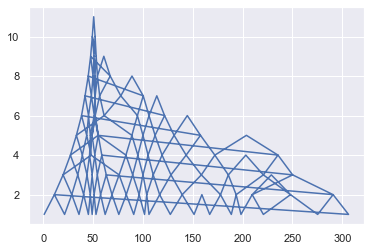

In [19]:
# попыталась сделать вручную сделать дендрограмму, но вышло так себе :(
plt.plot(clustersdf['x'], clustersdf['y'])

Давайте теперь попробуем использовать уже существующее, "нормальное", решение для иерархической кластеризации

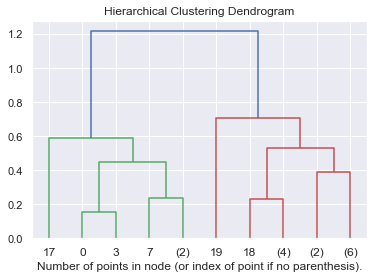

In [20]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_for_clustering)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### 2 кластера

![2_кластера](Screenshot_2.png)

#### 3 кластера

![3_кластера](Screenshot_3.png)

#### 4 кластера 

![4_кластера](Screenshot_4.png)

### Выводы

<p style="text-indent: 25px;">
    В результате выполненной работы были получены алгоритм выполнения иерархической кластеризации, который аналитически работает неплохо, но визуально всё довольно печально :(
    Использовав уже существующее решение была построена нормальная дендрограмма, на которой обьективное число кластеров составляет 2 (так как что в первом кластере, что во втором одинаковое к-во обьектов). 
    Подводя итоги, хочется сказать, что хоть иерархическая кластеризация выглядит довольно интересной, но на практике её довольно трудно использовать и интерпретировать. Те же k-средних и KRAB достаточно понятны, и их можно без каких-либо проблем использовать для решения актуальных задач. Также хочется добавить, хоть это и довольно рискованно, но один не безизвестный магистр нашей кафедры, Бабенко Виталий, недоволен тем, чем мы занимаемся, и спрашивает почему мы по теме кластеризации мы не проходим DBSCAN. Разобравшись в теме хочется сказать, что этот алгоритм пожалуй самый интересный из тех, что мы проходили + на практике часто используется как раз таки этот алгоритм. Поэтому хотелось бы (если можно) в качестве дополнительного задания рассмотреть этот алгоритм, и использовать его для наших данных.
    Спасибо за внимание! :)
</p>